In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Data Prep for Modeling

## Dataset

32,000 people's info, with a binary classification of over or under 50k income/year, rom USI ML website.["Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset".](https://archive.ics.uci.edu/ml/datasets/Adult)

Listing of attributes: 

__Outcome variable__: <=50K. 

__Columns:__
- __age__: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- __education-num__: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
__occupation__: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, - Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- __race__: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- __sex__: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- __hours-per-week__: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
sns.set_style("white")
df = pd.read_csv('adult.data')
df.columns = ['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'income<=50K'
             ]

### Make classifier col boolean

In [4]:
df['income<=50K'] = (df['income<=50K'].str.strip() == '<=50K')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,True
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,True
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,True
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,True
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,True
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,True
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,False
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,False
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,False
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,False


### Strip whitespace

In [5]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [6]:
df['capital-change'] = df['capital-gain'] - df['capital-loss']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income<=50K,capital-change
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,True,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,True,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,True,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,True,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,True,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,True,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,False,0
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,False,14084
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,False,5178
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,False,0


# Explore the variables using the univariate and bivariate methods you've learned so far. *Note: I've moved explorations specific to certain features to where that feature is created.*

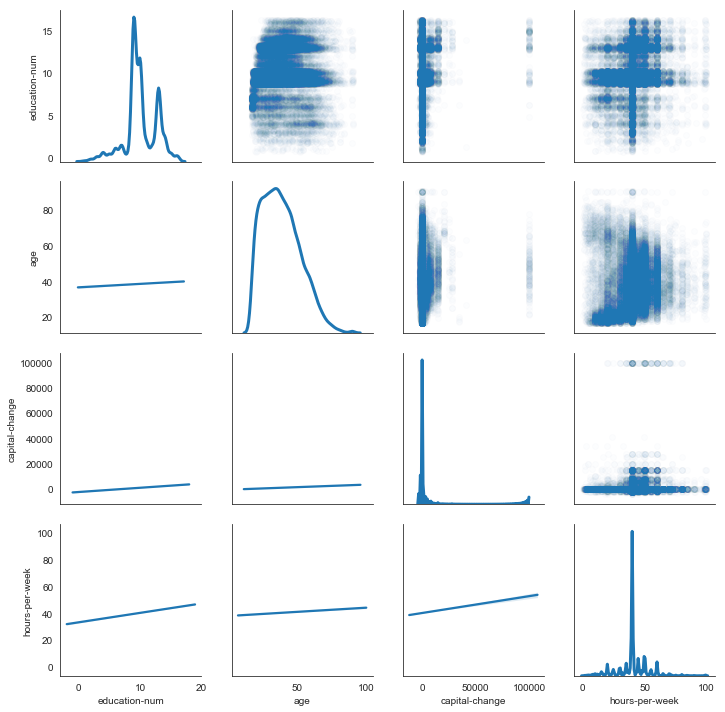

In [7]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df.loc[:, ['education-num', 'age', 'capital-change', 'hours-per-week']].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.01)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043159      0.000437     -0.010259   
education-num   0.036527 -0.043159       1.000000      0.122627      0.079932   
capital-gain    0.077674  0.000437       0.122627      1.000000     -0.031614   
capital-loss    0.057775 -0.010259       0.079932     -0.031614      1.000000   
hours-per-week  0.068756 -0.018770       0.148127      0.078409      0.054256   
income<=50K    -0.234039  0.009481      -0.335182     -0.223333     -0.150523   
capital-change  0.074284  0.000993       0.117888      0.998521     -0.085901   

                hours-per-week  income<=50K  capital-change  
age                   0.068756    -0.234039        0.074284  
fnlwgt               -0.018770     0.009481        0.000993  
education-num         0.148127    -0.335182        0.117888  
capital-gain          

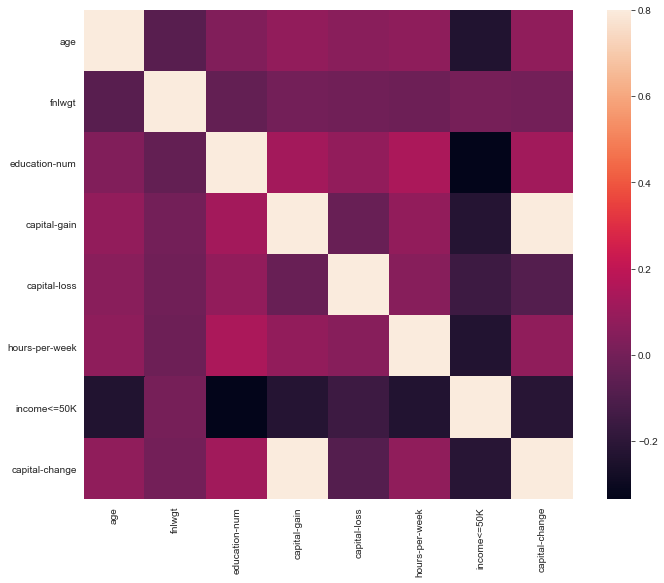

In [8]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

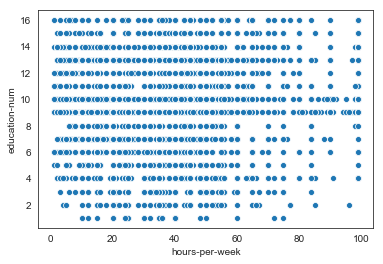

In [9]:
sns.scatterplot(x="hours-per-week", y='education-num', data=df)

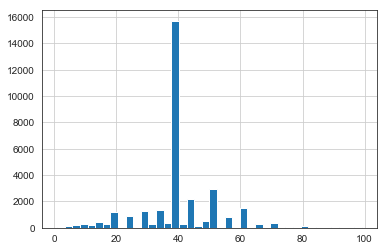

In [10]:
df['hours-per-week'].hist(bins=40)

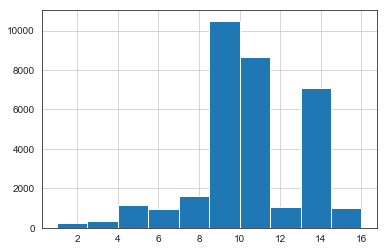

In [11]:
df['education-num'].hist()

In [12]:
df['income<=50K'].sum() / len(df['income<=50K'])

0.7591830466830467

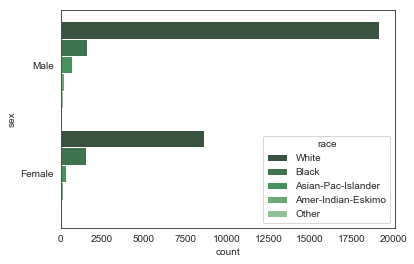

race    Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
sex                                                                
Female                 119                 346   1555    109   8642
Male                   192                 693   1569    162  19173
Power_divergenceResult(statistic=104988.21683046684, pvalue=0.0)


In [13]:
# Plot counts for each combination of levels.
sns.countplot(y="sex", hue="race", data=df, palette="Greens_d")
plt.show()

# # Table of counts
counttable = pd.crosstab(df['sex'], df['race'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

### Most people are originally from the US in the dastaset

In [14]:
# # Table of counts
counttable = pd.crosstab(df['sex'], df['native-country'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

native-country    ?  Cambodia  Canada  China  Columbia  Cuba  \
sex                                                            
Female          163         3      39     21        24    40   
Male            420        16      82     54        35    55   

native-country  Dominican-Republic  Ecuador  El-Salvador  England     ...      \
sex                                                                   ...       
Female                          35        9           35       32     ...       
Male                            35       19           71       58     ...       

native-country  Portugal  Puerto-Rico  Scotland  South  Taiwan  Thailand  \
sex                                                                        
Female                12           52         5     30      15        11   
Male                  25           62         7     50      36         7   

native-country  Trinadad&Tobago  United-States  Vietnam  Yugoslavia  
sex                                        

In [15]:
non_us = df[df['native-country'] != 'United-States']['income<=50K']
non_us.sum() / len(non_us)

0.8024181657328222

In [16]:
len(df)

32560

# *Generating Features*

## Based on what you learned via your data exploration, *create 10 new features*. Explain the reasoning behind each one.

## Use filtering methods to select the five best features. justify your choices.


In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income<=50K,capital-change
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,True,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,True,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,True,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,True,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,True,0


In [18]:
model_df = df[['income<=50K', 'sex']]
model_df

,income<=50K,sex
0,True,Male
1,True,Male
2,True,Male
3,True,Female
4,True,Female
5,True,Female
6,False,Male
7,False,Female
8,False,Male
9,False,Male


### 1. `is_working_age`, ie 18 to 65?
__Questions__: This one I feel very unsure on, partly because it's had to see in the skewed distribution, but also because I think maybe I should ask "are you in key high earning stage of life?" ie 35<age<55?

In [285]:
model_df.loc[:,'is_working_age'] = df.loc[:,'age'].apply(lambda age: (20 < age < 60))

,income<=50K,sex,is_working_age,capital_gain>=5K,full_time,college_or_greater,has_never_married
0,1.0,Male,True,False,False,True,False
1,1.0,Male,True,False,True,False,False
2,1.0,Male,True,False,True,False,False
3,1.0,Female,True,False,True,True,False
4,1.0,Female,True,False,True,True,False
5,1.0,Female,True,False,False,False,False
6,0.0,Male,True,False,True,False,False
7,0.0,Female,True,True,True,True,True
8,0.0,Male,True,True,True,True,False
9,0.0,Male,True,False,True,False,False


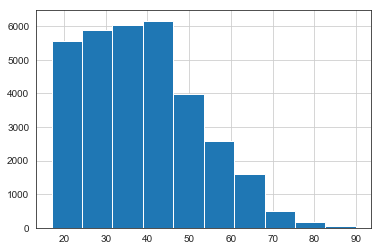

In [287]:
df['age'].hist()

### Average income bin by age

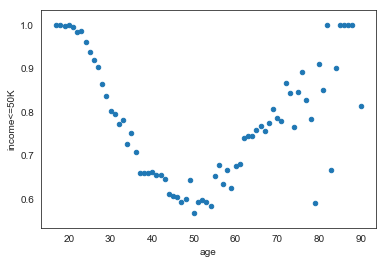

In [40]:
df.groupby('age').agg('mean').reset_index().plot.scatter('age', 'income<=50K')

### 2. `has_capital_change`
People with any significant capital change tend to be higher income, since they're able to make investments. 

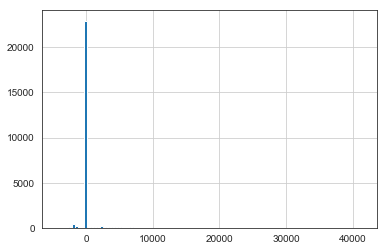

In [28]:
df[df['income<=50K'] == 1]['capital-change'].hist(bins=100)

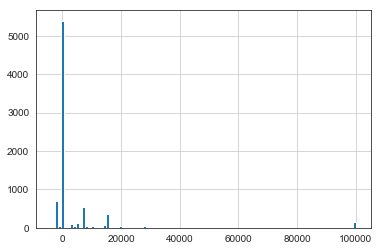

In [29]:
df[df['income<=50K'] == 0]['capital-change'].hist(bins=100)

In [250]:
df[df['capital-change'] > 5000]['income<=50K'].describe()

count      1648
unique        2
top       False
freq       1496
Name: income<=50K, dtype: object

In [42]:
model_df.loc[:,'has_capital_change'] = df.loc[:,'capital-change'].apply(lambda cc: cc != 0)

### 3. `full_time`, ie between horus >= 35
I notice that the there's a huge part of the population that works full time, both male and female, and then those who don't. Those who work much more than 35 hours tend to have make >50K.

__Questions:__ should I break it up into *3* categorical variables: <35, 35<hrs<45, 45<hrs?

In [272]:
model_df.loc[:,'full_time'] = df.loc[:,'hours-per-week'].apply(lambda hours: hours >= 35)

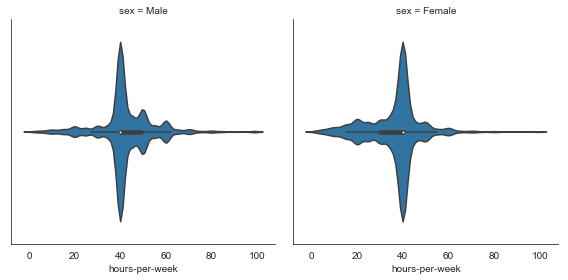

hours-per-week
Ttest_indResult(statistic=42.50936339903957, pvalue=0.0)


In [266]:
# Plot all the variables with boxplots for each country.
g = sns.FacetGrid(df, col="sex", size=4, aspect=1)
g = g.map(sns.violinplot, "hours-per-week")
plt.show()

# # Test whether group differences are significant.
for col in ['hours-per-week']:
    print(col)
    print(stats.ttest_ind(
        df[df['sex'] == 'Male'][col].dropna(),
        df[df['sex'] == 'Female'][col].dropna()
    ))

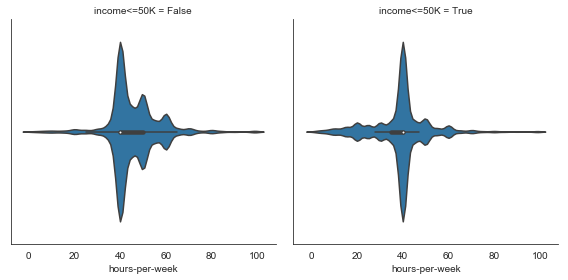

hours-per-week
Ttest_indResult(statistic=-42.58331943927707, pvalue=0.0)


In [268]:
# Plot all the variables with boxplots for each country.
g = sns.FacetGrid(df, col="income<=50K", size=4, aspect=1)
g = g.map(sns.violinplot, "hours-per-week")
plt.show()

# # Test whether group differences are significant.
for col in ['hours-per-week']:
    print(col)
    print(stats.ttest_ind(
        df[df['income<=50K'] == True][col].dropna(),
        df[df['income<=50K'] == False][col].dropna()
    ))

### 4. `college_or_greater`, ie educatoin_num >= 13
People with college degrees or greater have higher wages.

In [278]:
model_df.loc[:,'college_or_greater'] = df.loc[:,'education-num'].apply(lambda ed: ed >= 13)

In [276]:
df[df['education-num'] >= 13]['income<=50K'].describe()

count     8066
unique       2
top       True
freq      4157
Name: income<=50K, dtype: object

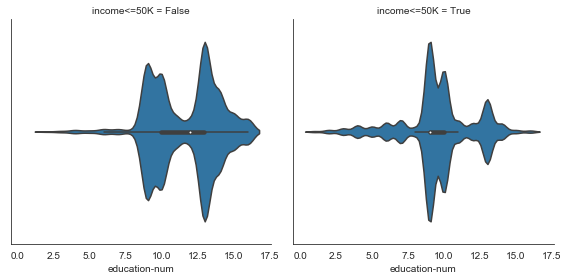

In [282]:
# Plot all the variables with boxplots for each country.
g = sns.FacetGrid(df, col="income<=50K", size=4, aspect=1)
g = g.map(sns.violinplot, "education-num")
plt.show()

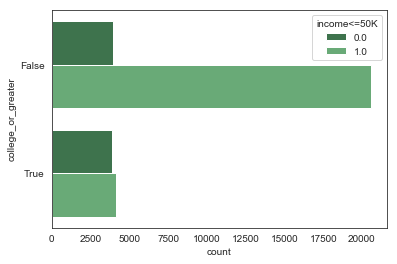

income<=50K          0.0    1.0
college_or_greater             
False               3932  20562
True                3909   4157
Power_divergenceResult(statistic=25279.975184275183, pvalue=0.0)


In [281]:
# Plot counts for each combination of levels.
sns.countplot(y="college_or_greater", hue="income<=50K", data=model_df, palette="Greens_d")
plt.show()

# # Table of counts
counttable = pd.crosstab(model_df['college_or_greater'], model_df['income<=50K'])
print(counttable)

# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

### 5. `has_never_married`
__Question__: would it be more effective to just say "are you under 30?"

In [288]:
model_df.loc[:,'has_never_married'] = df.loc[:,'marital-status'].apply(lambda status: status == 'Never-married')

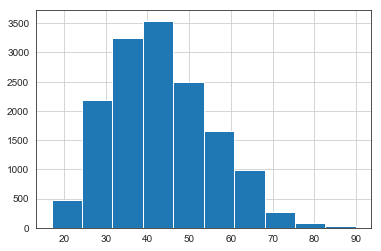

In [30]:
# try Married-civ-spouse
df[df['marital-status'] == 'Never-married']['age'].hist()

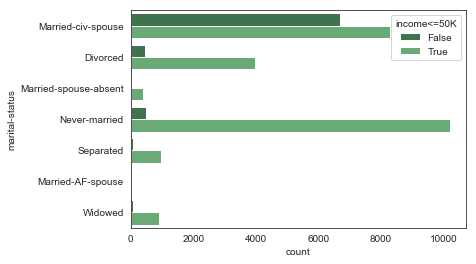

income<=50K            False  True 
marital-status                     
Divorced                 463   3980
Married-AF-spouse         10     13
Married-civ-spouse      6692   8284
Married-spouse-absent     34    384
Never-married            491  10191
Separated                 66    959
Widowed                   85    908
Power_divergenceResult(statistic=68683.93157248157, pvalue=0.0)


In [289]:
# Plot counts for each combination of levels.
sns.countplot(y="marital-status", hue="income<=50K", data=df, palette="Greens_d")
plt.show()

# # Table of counts
counttable = pd.crosstab(df['marital-status'], df['income<=50K'])
print(counttable)
print(stats.chisquare(counttable, axis=None))

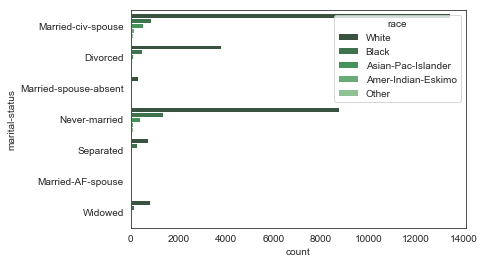

race                   Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  \
marital-status                                                                
Divorced                               60                  75    485     26   
Married-AF-spouse                       0                   0      1      0   
Married-civ-spouse                    116                 508    837    105   
Married-spouse-absent                   9                  41     62     15   
Never-married                         103                 372   1346    105   
Separated                              11                  19    265     13   
Widowed                                12                  24    128      7   

race                   White  
marital-status                
Divorced                3797  
Married-AF-spouse         22  
Married-civ-spouse     13410  
Married-spouse-absent    291  
Never-married           8756  
Separated                717  
Widowed                  822  
Power_div

In [290]:
# Plot counts for each combination of levels.
sns.countplot(y="marital-status", hue="race", data=df, palette="Greens_d")
plt.show()

# # Table of counts
counttable = pd.crosstab(df['marital-status'], df['race'])
print(counttable)
print(stats.chisquare(counttable, axis=None))